# Data Analytics Project - Backtesting Model Predictions

# TATAMOTORS STOCK MODELS EVALUATION

---

# 1. Importing Required Modules

In [1]:
import pandas as pd

# 2. Get required datasets

## 2.1. Get the orders dataset of TATAMOTORS

In [2]:
orders_df = pd.read_csv('../Preprocess/Pair3/Pair3_orders.csv')
orders_df.head()

,Date,TATAMOTORS_Close,TWL_Close,Spread,zscore,Orders
0,2018-01-08,433.549988,177.449997,256.099991,1.441892,FLAT
1,2018-01-09,437.549988,174.800003,262.749985,1.987008,SHORT
2,2018-01-10,433.299988,171.399994,261.899994,1.917332,SHORT
3,2018-01-11,434.750000,175.149994,259.600006,1.728797,SHORT
4,2018-01-12,437.100006,174.050003,263.050003,2.011601,SHORT


In [3]:
orders_df.tail()

,Date,TATAMOTORS_Close,TWL_Close,Spread,zscore,Orders
55,2018-04-02,339.149994,114.199997,224.949997,-1.111545,FLAT
56,2018-04-03,343.100006,118.349998,224.750008,-1.127938,FLAT
57,2018-04-04,355.600006,114.849998,240.750008,0.183619,GET_OUT_OF_POSITION
58,2018-04-05,362.200012,116.900002,245.300011,0.556593,FLAT
59,2018-04-06,364.100006,119.599998,244.500008,0.491015,FLAT


## 2.2. Visualize the orders

Text(0, 0.5, 'zscore')

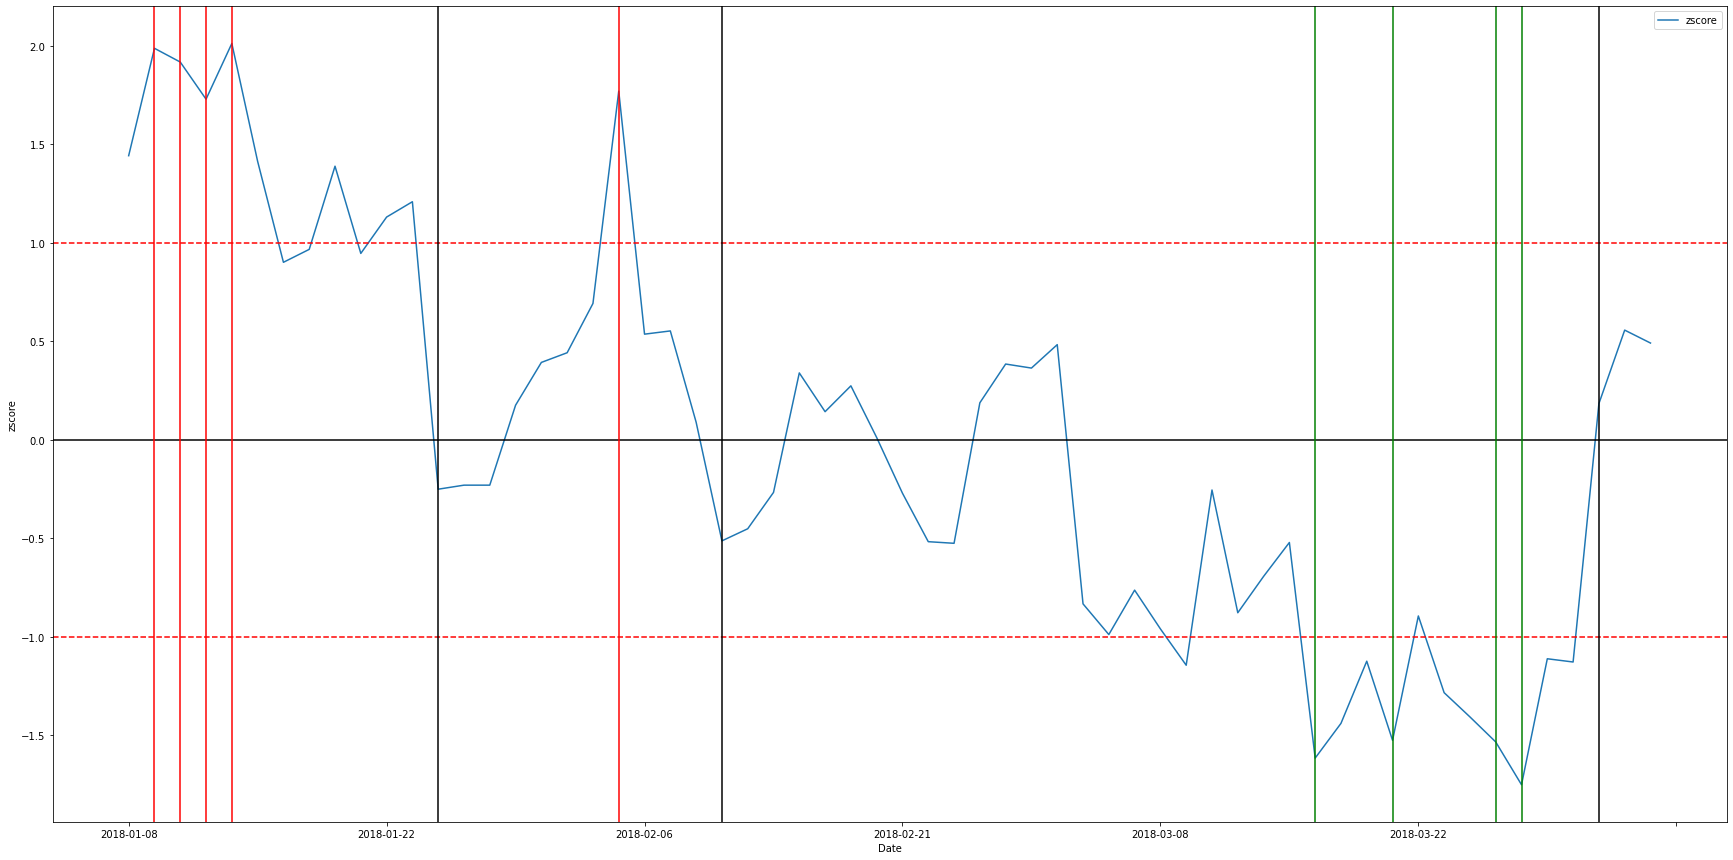

In [4]:
# Plotting the zscore of the Spread
orders_plt = orders_df.plot(x='Date', y='zscore', figsize=(30,15))

# Plotting the lines at mean, 1 and 2 std. dev.
orders_plt.axhline(0, c='black')
orders_plt.axhline(1, c='red', ls = "--")
orders_plt.axhline(-1, c='red', ls = "--")

# Extracting orders
Orders = orders_df['Orders']

# Plot vertical lines where orders are placed
for order in range(len(Orders)):
    
    if Orders[order] != "FLAT":
        
        # GREEN line for a long position
        if Orders[order] == "LONG":
            orders_plt.axvline(x=order, c = "green")
        
        # RED line for a short position
        elif Orders[order] == "SHORT":
            orders_plt.axvline(x=order, c = "red")
        
        # BLACK line for getting out of all positions at that point
        else:
            orders_plt.axvline(x=order, c = "black")

orders_plt.set_ylabel("zscore")

__In the figure above:__
- __Blue line__ - zscore of the Spread
- __Black horizontal line__ at 0 - Mean
- __Red dotted horizontal lines__ - at +1 and -1 standard deviations
- __Green vertical line__ - represents long position taken on that day
- __Red vertical line__ - represents short position taken on that day
- __Black vertical line__ - represents getting out of all open positions till that point


## 2.3. Get the predicitions dataset of TATAMOTORS

In [5]:
predictions = pd.read_csv("../Models/Pair3/Tata_predicitions.csv")
predictions.head()

,Date,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close
0,2018-01-08,433.549988,259.002342,263.351346,NaN
1,2018-01-09,437.549988,258.402641,265.761722,NaN
2,2018-01-10,433.299988,257.802941,265.536848,NaN
3,2018-01-11,434.750000,257.203241,257.958445,NaN
4,2018-01-12,437.100006,255.744917,256.235580,NaN


In [6]:
predictions = predictions.dropna()
predictions.head()

,Date,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close
10,2018-01-22,421.899994,250.688392,263.798438,259.62628
11,2018-01-23,418.000000,249.488991,262.302971,258.46660
12,2018-01-24,403.600006,248.030668,264.030434,256.74530
13,2018-01-25,400.299988,247.430967,268.796080,254.28227
14,2018-01-29,399.250000,246.831267,267.191347,251.20203


## 2.4 Visualize the predictions by different models

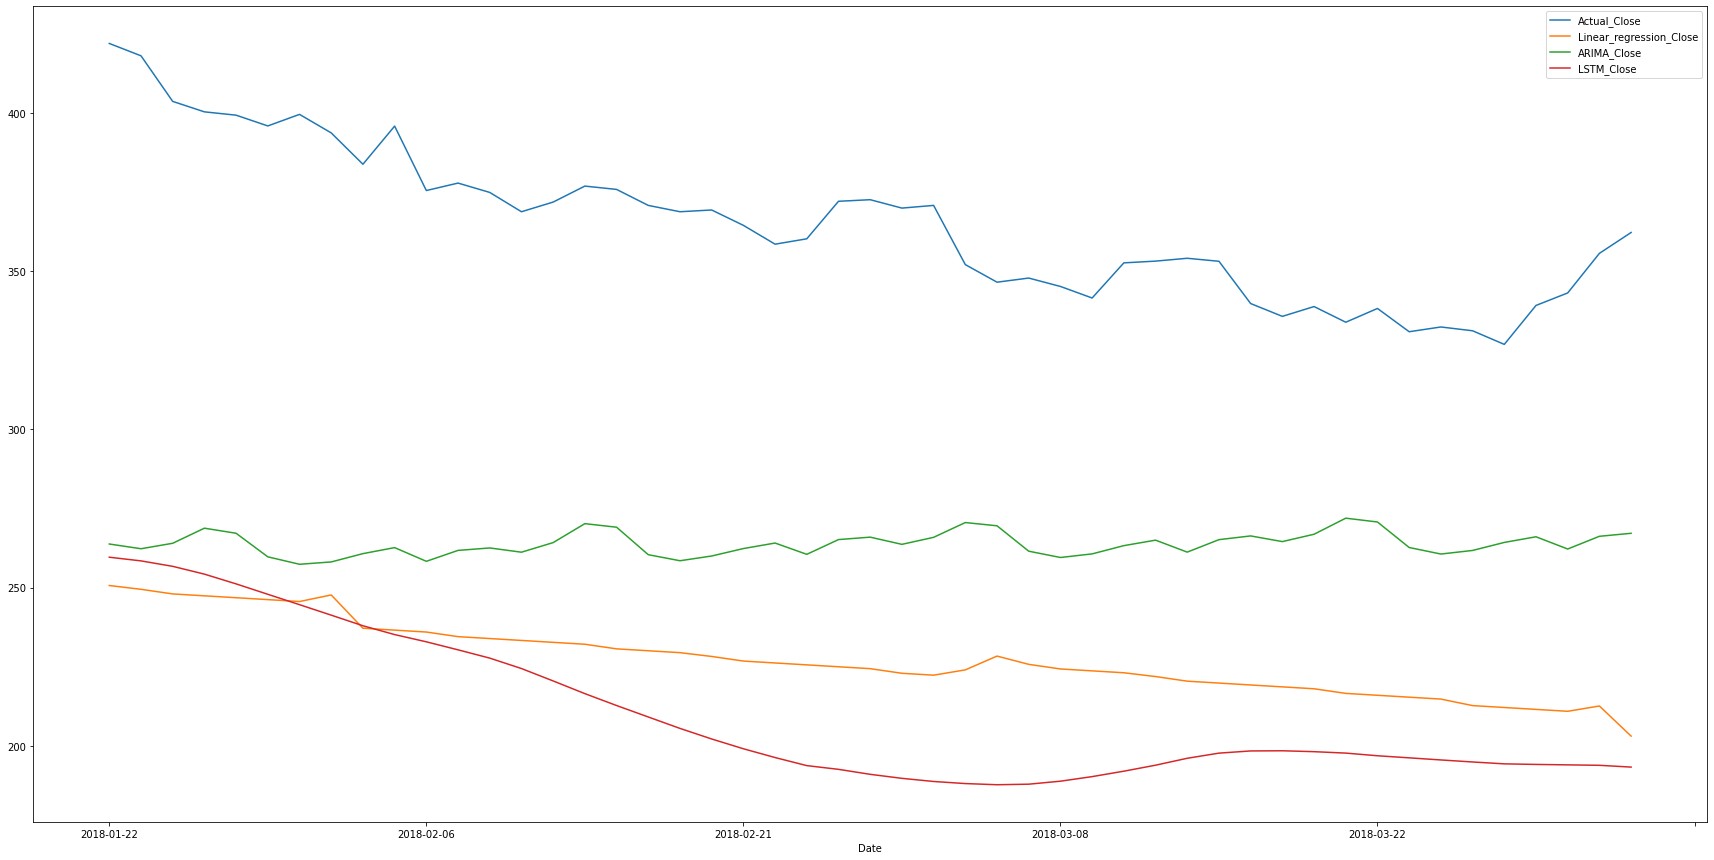

In [7]:
predictions.plot(x='Date', y=['Actual_Close', 'Linear_regression_Close', 'ARIMA_Close', 'LSTM_Close'], figsize=(30,15))

__In the figure above:__
- __x-axis__ - Date
- __y-axis__ - Price in rupees
- __Blue line__ - Actual data in the time period of correlation
- __Orange line__ - Linear Regression predictions for the time period
- __Red line__ - LSTM predictions for the time period
- __Green line__ - ARIMA predictions for the time period


---

# 3. Set parameters of trading

In [8]:
CAPITAL = 1000000
RISK = 20000 # Max risk allowed per trade (2% of capital)

- CAPITAL - Total amout of money willing to be spent.
- RISK - Amount to spend per trade (maximum).
- OPEN POSITION - Buy/Short shares of stock worth 20000.
- CLOSE POSITION - Buy/Sell shares to consolidate open positions and take profit/loss.
- TRADE_BOOK - Keeps track of all open positions.
- For the purpose of this experiment, we assume no brokerage costs, which is a fair assumption as many brokers (such as zerodha, robinhood, sharekhan, etc.) offer equity delivery at no cost.

---

# 4. Evaluate all individual orders

## 4.1. Display all orders which are not *FLAT*

In [13]:
not_flat_orders = orders_df[orders_df['Orders'] != 'FLAT']
not_flat_orders

,Date,TATAMOTORS_Close,TWL_Close,Spread,zscore,Orders
1,2018-01-09,437.549988,174.800003,262.749985,1.987008,SHORT
2,2018-01-10,433.299988,171.399994,261.899994,1.917332,SHORT
3,2018-01-11,434.750000,175.149994,259.600006,1.728797,SHORT
4,2018-01-12,437.100006,174.050003,263.050003,2.011601,SHORT
12,2018-01-24,403.600006,168.149994,235.450012,-0.250834,GET_OUT_OF_POSITION
19,2018-02-05,395.799988,135.699997,260.099991,1.769782,SHORT
23,2018-02-09,368.750000,136.500000,232.250000,-0.513147,GET_OUT_OF_POSITION
46,2018-03-16,339.750000,120.949997,218.800003,-1.615674,LONG
49,2018-03-21,333.850006,113.949997,219.900009,-1.525504,LONG
53,2018-03-27,331.149994,111.349998,219.799995,-1.533702,LONG


In [14]:
not_flat_orders = not_flat_orders.set_index('Date').reset_index()
not_flat_orders

,Date,TATAMOTORS_Close,TWL_Close,Spread,zscore,Orders
0,2018-01-09,437.549988,174.800003,262.749985,1.987008,SHORT
1,2018-01-10,433.299988,171.399994,261.899994,1.917332,SHORT
2,2018-01-11,434.750000,175.149994,259.600006,1.728797,SHORT
3,2018-01-12,437.100006,174.050003,263.050003,2.011601,SHORT
4,2018-01-24,403.600006,168.149994,235.450012,-0.250834,GET_OUT_OF_POSITION
5,2018-02-05,395.799988,135.699997,260.099991,1.769782,SHORT
6,2018-02-09,368.750000,136.500000,232.250000,-0.513147,GET_OUT_OF_POSITION
7,2018-03-16,339.750000,120.949997,218.800003,-1.615674,LONG
8,2018-03-21,333.850006,113.949997,219.900009,-1.525504,LONG
9,2018-03-27,331.149994,111.349998,219.799995,-1.533702,LONG


## 4.2 Flip all orders

In [11]:
def flip_orders(orders):
    
    flipped_orders = []
    
    for order in orders:
        if order == 'SHORT':
            flipped_orders.append('LONG')
        elif order == 'LONG':
            flipped_orders.append('SHORT')
        else:
            flipped_orders.append(order)
    
    return flipped_orders


In [15]:
# not_flat_orders['Orders'] = flip_orders(not_flat_orders['Orders'])
not_flat_orders

,Date,TATAMOTORS_Close,TWL_Close,Spread,zscore,Orders
0,2018-01-09,437.549988,174.800003,262.749985,1.987008,SHORT
1,2018-01-10,433.299988,171.399994,261.899994,1.917332,SHORT
2,2018-01-11,434.750000,175.149994,259.600006,1.728797,SHORT
3,2018-01-12,437.100006,174.050003,263.050003,2.011601,SHORT
4,2018-01-24,403.600006,168.149994,235.450012,-0.250834,GET_OUT_OF_POSITION
5,2018-02-05,395.799988,135.699997,260.099991,1.769782,SHORT
6,2018-02-09,368.750000,136.500000,232.250000,-0.513147,GET_OUT_OF_POSITION
7,2018-03-16,339.750000,120.949997,218.800003,-1.615674,LONG
8,2018-03-21,333.850006,113.949997,219.900009,-1.525504,LONG
9,2018-03-27,331.149994,111.349998,219.799995,-1.533702,LONG


- As TATAMOTORS is the stock with the higher price value, in pair trading we need to take the position opposite to the one we take on the larger stock. Hence the positions to take are __NOT__ flipped.

## 4.3. Get predictions of dates where orders are placed

### 4.3.1. Filter rows in predictions to only include dates where orders are placed

In [16]:
not_flat_orders = not_flat_orders.set_index('Date')
not_flat_orders

,TATAMOTORS_Close,TWL_Close,Spread,zscore,Orders
Date,,,,,
2018-01-09,437.549988,174.800003,262.749985,1.987008,SHORT
2018-01-10,433.299988,171.399994,261.899994,1.917332,SHORT
2018-01-11,434.750000,175.149994,259.600006,1.728797,SHORT
2018-01-12,437.100006,174.050003,263.050003,2.011601,SHORT
2018-01-24,403.600006,168.149994,235.450012,-0.250834,GET_OUT_OF_POSITION
2018-02-05,395.799988,135.699997,260.099991,1.769782,SHORT
2018-02-09,368.750000,136.500000,232.250000,-0.513147,GET_OUT_OF_POSITION
2018-03-16,339.750000,120.949997,218.800003,-1.615674,LONG
2018-03-21,333.850006,113.949997,219.900009,-1.525504,LONG


In [17]:
predicitions = predictions.set_index('Date')
predicitions

,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close
Date,,,,
2018-01-22,421.899994,250.688392,263.798438,259.62628
2018-01-23,418.000000,249.488991,262.302971,258.46660
2018-01-24,403.600006,248.030668,264.030434,256.74530
2018-01-25,400.299988,247.430967,268.796080,254.28227
2018-01-29,399.250000,246.831267,267.191347,251.20203
2018-01-30,395.850006,246.231567,259.745147,247.91590
2018-01-31,399.500000,245.631866,257.397678,244.63423
2018-02-01,393.649994,247.706085,258.133274,241.32506
2018-02-02,383.750000,237.194816,260.756083,237.97710


In [18]:
orders_predictions = predicitions.join(not_flat_orders)
orders_predictions = orders_predictions.dropna()
orders_predictions

,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close,TATAMOTORS_Close,TWL_Close,Spread,zscore,Orders
Date,,,,,,,,,
2018-01-24,403.600006,248.030668,264.030434,256.74530,403.600006,168.149994,235.450012,-0.250834,GET_OUT_OF_POSITION
2018-02-05,395.799988,236.595116,262.657607,235.18872,395.799988,135.699997,260.099991,1.769782,SHORT
2018-02-09,368.750000,233.337692,261.209758,224.46454,368.750000,136.500000,232.250000,-0.513147,GET_OUT_OF_POSITION
2018-03-16,339.750000,219.272663,266.352034,198.43524,339.750000,120.949997,218.800003,-1.615674,LONG
2018-03-21,333.850006,216.614939,271.958380,197.75371,333.850006,113.949997,219.900009,-1.525504,LONG
2018-03-27,331.149994,212.757814,261.762357,194.95021,331.149994,111.349998,219.799995,-1.533702,LONG
2018-03-28,326.850006,212.158114,264.297195,194.35623,326.850006,109.699997,217.150009,-1.750928,LONG
2018-04-04,355.600006,212.630090,266.232397,193.89632,355.600006,114.849998,240.750008,0.183619,GET_OUT_OF_POSITION


### 4.3.2 Remove columns in orders and predictions dataframe

In [20]:
orders_predictions = orders_predictions.drop(columns=['TATAMOTORS_Close', 'TWL_Close', 'Spread', 'zscore'])
orders_predictions

,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close,Orders
Date,,,,,
2018-01-24,403.600006,248.030668,264.030434,256.74530,GET_OUT_OF_POSITION
2018-02-05,395.799988,236.595116,262.657607,235.18872,SHORT
2018-02-09,368.750000,233.337692,261.209758,224.46454,GET_OUT_OF_POSITION
2018-03-16,339.750000,219.272663,266.352034,198.43524,LONG
2018-03-21,333.850006,216.614939,271.958380,197.75371,LONG
2018-03-27,331.149994,212.757814,261.762357,194.95021,LONG
2018-03-28,326.850006,212.158114,264.297195,194.35623,LONG
2018-04-04,355.600006,212.630090,266.232397,193.89632,GET_OUT_OF_POSITION


### 4.3.3 Create function to evaluate orders

In [21]:
def evaluate_orders(orders_df):
    
    actual_profits = []
    LR_profits = []
    ARIMA_profits = []
    LSTM_profits = []
    shares = []
    
    num_orders = len(orders_df["Orders"])
    
    for i in range(num_orders):
        
        if i == num_orders - 1:
            actual_profits.append(0)
            LR_profits.append(0)
            ARIMA_profits.append(0)
            LSTM_profits.append(0)
            shares.append(0)
            break
        
        position = orders_df['Orders'][i]
        close = orders_df['Actual_Close'][i]
        LR_close = orders_df['Linear_regression_Close'][i]
        ARIMA_close = orders_df['ARIMA_Close'][i]
        LSTM_close = orders_df['LSTM_Close'][i]
        
        print()
        
        print("ORDER: ", i, close, LR_close, ARIMA_close, LSTM_close, position)
        
        if position == 'LONG' or position == 'SHORT':
            
            no_of_shares = 20000//close
            
            for j in range(i+1, num_orders):
                
                if (j == num_orders - 1) or orders_df['Orders'][j] == 'GET_OUT_OF_POSITION':
                    
                    actual_profit = orders_df['Actual_Close'][j] - orders_df['Actual_Close'][i]
                    LR_profit = orders_df['Linear_regression_Close'][j] - orders_df['Linear_regression_Close'][i]
                    ARIMA_profit = orders_df['ARIMA_Close'][j] - orders_df['ARIMA_Close'][i]
                    LSTM_profit = orders_df['LSTM_Close'][j] - orders_df['LSTM_Close'][i]
                    
                    actual_profit *= no_of_shares
                    LR_profit *= no_of_shares
                    ARIMA_profit *= no_of_shares
                    LSTM_profit  *= no_of_shares
                    
                    if position == 'SHORT':
                        actual_profit *= -1
                        LR_profit *= -1
                        ARIMA_profit *= -1
                        LSTM_profit *= -1
                    
                    print('number of shares: ', no_of_shares)
                    print('actual profit: ', actual_profit)
                    print('LR profit: ', LR_profit)
                    print('ARIMA profit: ', ARIMA_profit)
                    print('LSTM profit: ', LSTM_profit)
                    
                    shares.append(no_of_shares)
                    actual_profits.append(actual_profit)
                    LR_profits.append(LR_profit)
                    ARIMA_profits.append(ARIMA_profit)
                    LSTM_profits.append(LSTM_profit)
                    
                    break
        else:
            actual_profits.append(0)
            LR_profits.append(0)
            ARIMA_profits.append(0)
            LSTM_profits.append(0)
            shares.append(0)
        
        print()
    
    return actual_profits, LR_profits, ARIMA_profits, LSTM_profits, shares
                    

In [22]:
actual_profits, LR_profits, ARIMA_profits, LSTM_profits, shares = evaluate_orders(orders_predictions)


ORDER:  0 403.6000061035156 248.03066783997932 264.03043405739885 256.7453 GET_OUT_OF_POSITION


ORDER:  1 395.7999877929688 236.5951158886892 262.6576065191251 235.18872000000002 SHORT
number of shares:  50.0
actual profit:  1352.4993896484402
LR profit:  162.8712188015939
ARIMA profit:  72.3924480862081
LSTM profit:  536.209000000001


ORDER:  2 368.75 233.33769151265733 261.20975755740096 224.46454 GET_OUT_OF_POSITION


ORDER:  3 339.75 219.27266288670944 266.3520342705421 198.43524 LONG
number of shares:  58.0
actual profit:  919.3003540039062
LR profit:  -385.26922497188207
ARIMA profit:  -6.9389372143728
LSTM profit:  -263.25735999999944


ORDER:  4 333.8500061035156 216.6149388799677 271.9583799154903 197.75371 LONG
number of shares:  59.0
actual profit:  1283.25
LR profit:  -235.1060814184619
ARIMA profit:  -337.8329671148398
LSTM profit:  -227.58601000000056


ORDER:  5 331.1499938964844 212.7578141345876 261.7623569782249 194.95021 LONG
number of shares:  60.0
actual profit:

In [23]:
actual_profits

[0,
 1352.4993896484402,
 0,
 919.3003540039062,
 1283.25,
 1467.000732421875,
 1753.75,
 0]

In [24]:
LR_profits

[0,
 162.8712188015939,
 0,
 -385.26922497188207,
 -235.1060814184619,
 -7.663445533256663,
 28.79055290122224,
 0]

In [25]:
LSTM_profits

[0,
 536.209000000001,
 0,
 -263.25735999999944,
 -227.58601000000056,
 -63.23339999999973,
 -28.054510000000477,
 0]

In [26]:
shares

[0, 50.0, 0, 58.0, 59.0, 60.0, 61.0, 0]

In [27]:
ARIMA_profits

[0,
 72.3924480862081,
 0,
 -6.9389372143728,
 -337.8329671148398,
 268.202426627613,
 118.04732801199776,
 0]

### 4.3.4 Adding evaluated orders to dataframe

In [28]:
orders_predictions

,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close,Orders
Date,,,,,
2018-01-24,403.600006,248.030668,264.030434,256.74530,GET_OUT_OF_POSITION
2018-02-05,395.799988,236.595116,262.657607,235.18872,SHORT
2018-02-09,368.750000,233.337692,261.209758,224.46454,GET_OUT_OF_POSITION
2018-03-16,339.750000,219.272663,266.352034,198.43524,LONG
2018-03-21,333.850006,216.614939,271.958380,197.75371,LONG
2018-03-27,331.149994,212.757814,261.762357,194.95021,LONG
2018-03-28,326.850006,212.158114,264.297195,194.35623,LONG
2018-04-04,355.600006,212.630090,266.232397,193.89632,GET_OUT_OF_POSITION


In [29]:
orders_predictions['Shares'] = shares
orders_predictions['Actual_profit'] = actual_profits
orders_predictions['Linear_regression_profit'] = LR_profits
orders_predictions['ARIMA_profit'] = ARIMA_profits
orders_predictions['LSTM_profit'] = LSTM_profits

In [31]:
orders_predictions

,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close,Orders,Shares,Actual_profit,Linear_regression_profit,ARIMA_profit,LSTM_profit
Date,,,,,,,,,,
2018-01-24,403.600006,248.030668,264.030434,256.74530,GET_OUT_OF_POSITION,0.0,0.000000,0.000000,0.000000,0.00000
2018-02-05,395.799988,236.595116,262.657607,235.18872,SHORT,50.0,1352.499390,162.871219,72.392448,536.20900
2018-02-09,368.750000,233.337692,261.209758,224.46454,GET_OUT_OF_POSITION,0.0,0.000000,0.000000,0.000000,0.00000
2018-03-16,339.750000,219.272663,266.352034,198.43524,LONG,58.0,919.300354,-385.269225,-6.938937,-263.25736
2018-03-21,333.850006,216.614939,271.958380,197.75371,LONG,59.0,1283.250000,-235.106081,-337.832967,-227.58601
2018-03-27,331.149994,212.757814,261.762357,194.95021,LONG,60.0,1467.000732,-7.663446,268.202427,-63.23340
2018-03-28,326.850006,212.158114,264.297195,194.35623,LONG,61.0,1753.750000,28.790553,118.047328,-28.05451
2018-04-04,355.600006,212.630090,266.232397,193.89632,GET_OUT_OF_POSITION,0.0,0.000000,0.000000,0.000000,0.00000


### 4.3.5 Visualizing the profits

In [32]:
orders_predictions = orders_predictions.reset_index()

In [33]:
orders_predictions

,Date,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close,Orders,Shares,Actual_profit,Linear_regression_profit,ARIMA_profit,LSTM_profit
0,2018-01-24,403.600006,248.030668,264.030434,256.74530,GET_OUT_OF_POSITION,0.0,0.000000,0.000000,0.000000,0.00000
1,2018-02-05,395.799988,236.595116,262.657607,235.18872,SHORT,50.0,1352.499390,162.871219,72.392448,536.20900
2,2018-02-09,368.750000,233.337692,261.209758,224.46454,GET_OUT_OF_POSITION,0.0,0.000000,0.000000,0.000000,0.00000
3,2018-03-16,339.750000,219.272663,266.352034,198.43524,LONG,58.0,919.300354,-385.269225,-6.938937,-263.25736
4,2018-03-21,333.850006,216.614939,271.958380,197.75371,LONG,59.0,1283.250000,-235.106081,-337.832967,-227.58601
5,2018-03-27,331.149994,212.757814,261.762357,194.95021,LONG,60.0,1467.000732,-7.663446,268.202427,-63.23340
6,2018-03-28,326.850006,212.158114,264.297195,194.35623,LONG,61.0,1753.750000,28.790553,118.047328,-28.05451
7,2018-04-04,355.600006,212.630090,266.232397,193.89632,GET_OUT_OF_POSITION,0.0,0.000000,0.000000,0.000000,0.00000


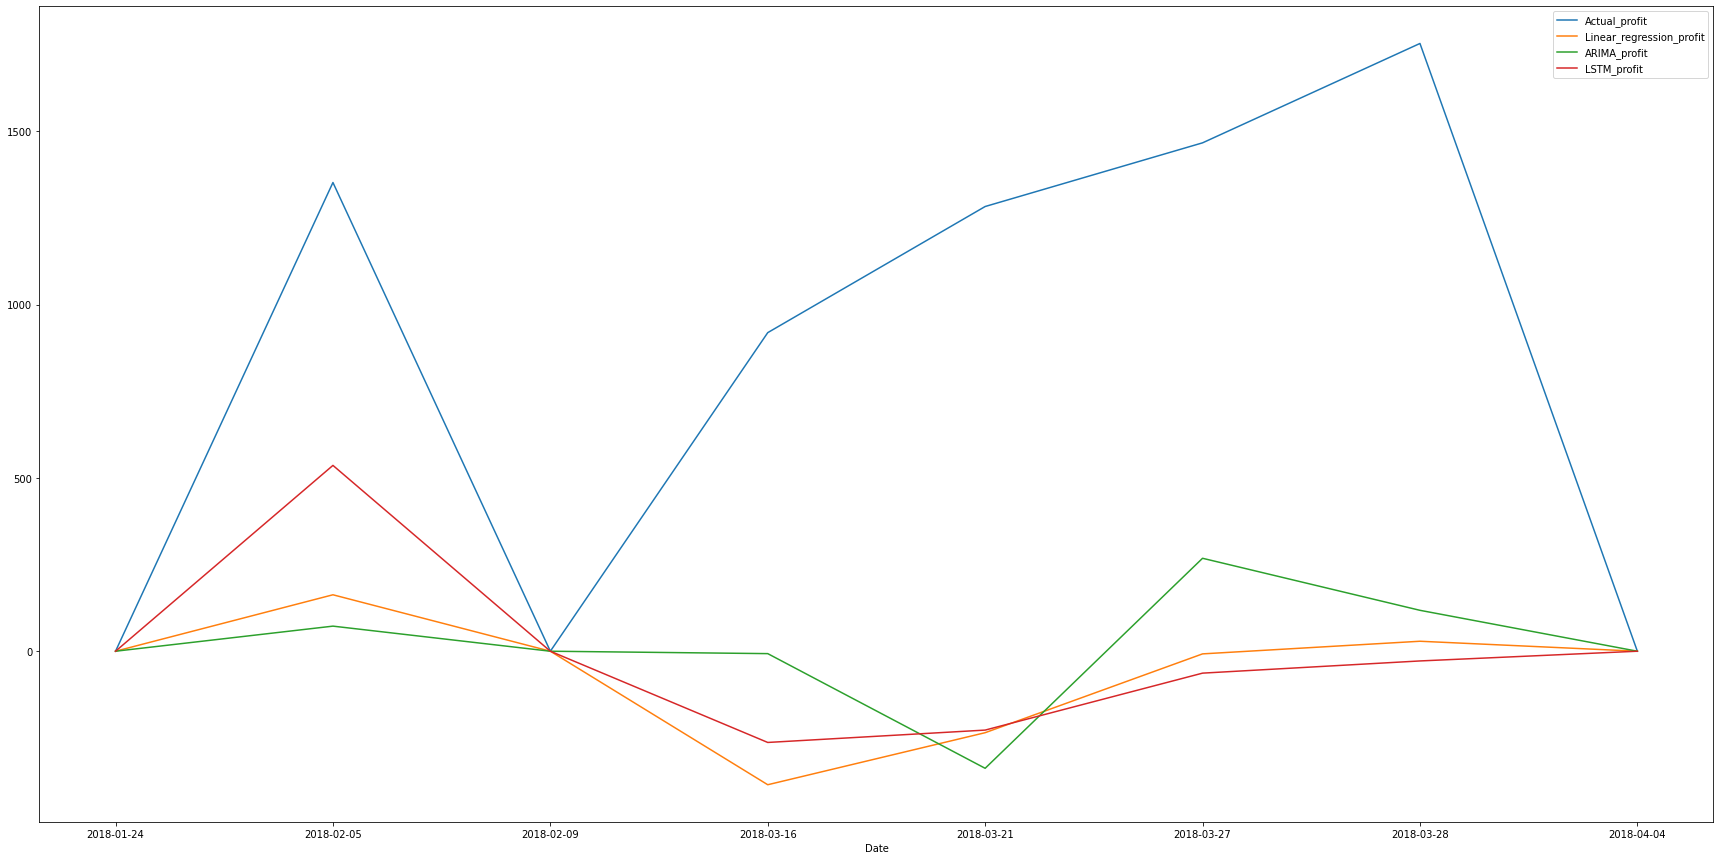

In [34]:
orders_predictions.plot(x='Date', y=['Actual_profit', 'Linear_regression_profit', 'ARIMA_profit', 'LSTM_profit'], figsize=(30,15))

__In the figure above:__
- __x-axis__ - Date
- __y-axis__ - Profit
- __Blue line__ - Actual profit
- __Orange line__ - Linear Regression predicted profit
- __Green line__ - ARIMA predicted profit
- __Red line__ - LSTM predicted profit

---